In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = '../Source/perf_tables/'
classification_name = 'RM_vs_RI_vs_LM_vs_LI_timewin_'
from_, to, win, step = -0.5, 0.5, 0.3, 0.05
ranges = [(round(start + 1e-7, 2), round(start + win + 1e-7, 2)) for start in np.arange(from_, to - win + step, step)]
dataframes = [
    pd.read_csv(
        os.path.join(
            path,
            f'{classification_name}{range_[0]}:{range_[1]}.csv'
        ),
        index_col=0
    )
    for range_ in ranges
]
subject_names = dataframes[0].index.to_list()
subjects_tc_test = np.array([[df['test_acc'][subject_name] for df in dataframes] for subject_name in subject_names])

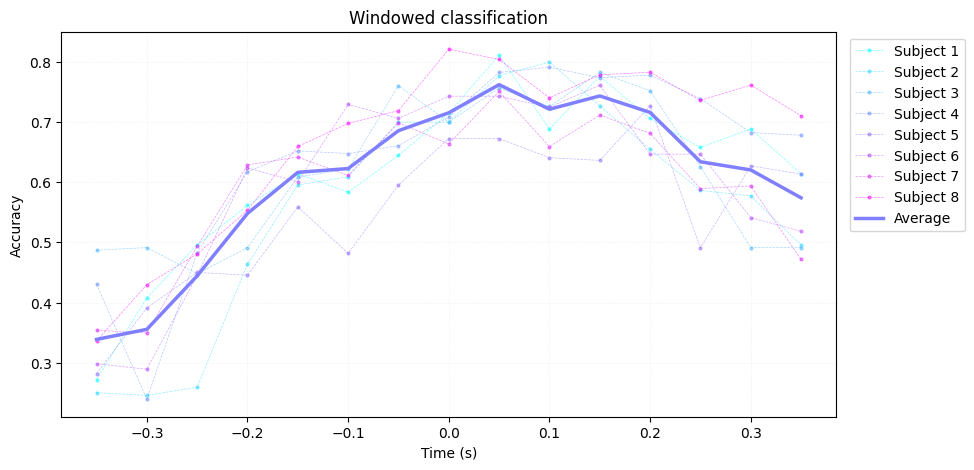

In [10]:
t = np.array(list(map(lambda x: sum(x)/len(x), ranges)))
parcentage = np.linspace(0, 1, len(subject_names))
cmap = plt.get_cmap('cool')

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(subjects_tc_test.shape[0]):
    ax.plot(
        t,
        subjects_tc_test[i, :],
        linestyle='--', linewidth=0.5,
        marker='o', markersize=2,
        color = cmap(parcentage[i]),
        alpha=0.5
    )
ax.plot(t, subjects_tc_test.mean(0), linewidth=2.5, color=cmap(0.5))
ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Time (s)')
ax.set_title('Windowed classification')
ax.legend([f'Subject {i + 1}' for i in range(len(subject_names))] + ['Average'], loc='upper right', bbox_to_anchor=(1.175, 1))


In [13]:
fig.savefig('/home/user/Documents/FingerMovementDecoder/Paper/pics/fig2s.png', dpi=600, bbox_inches='tight')